# ISLR Chapter 3 Exercise
Solved in Python rather than R. The required data files were downloaded from the excellent [ISLR-Python](https://github.com/JWarmenhoven/ISLR-python) repository

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
%matplotlib inline

## Question 8
Uses the Auto Dataset

In [4]:
df_Auto=pd.read_csv('data/Auto.csv')
df_Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df_Auto.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [6]:
data=df_Auto[df_Auto['horsepower'].apply(lambda x: x.isnumeric())]
data=data.astype({'horsepower':'int64'})
data.reset_index(drop=True,inplace=True)

In [7]:
results=smf.ols('mpg ~ horsepower',data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 21 May 2020   Prob (F-statistic):           7.03e-81
Time:                        12:38:22   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

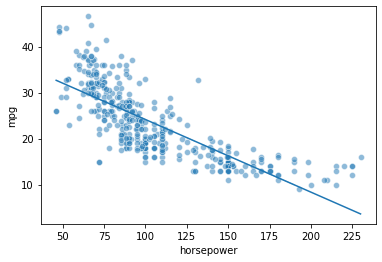

In [8]:
sns.scatterplot(x='horsepower',y='mpg',data=data,alpha=0.5)
sns.lineplot(x='horsepower',y=results.predict(),data=data)

#### Residual Plot

Text(0, 0.5, 'Residual')

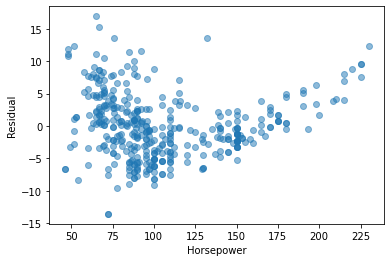

In [9]:
plt.scatter(data['horsepower'],results.resid,alpha=0.5)
plt.xlabel('Horsepower')
plt.ylabel('Residual')

In [10]:
prediction=results.get_prediction({'horsepower':[98]})
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


#### Explanations of the columns:  

- mean: the predicted value
- mean_se: standard error in the predicted value
- mean_ci: the confidence intervals
- obs_ci: the prediction intervals

## Question 9
Uses the 'Auto' dataset

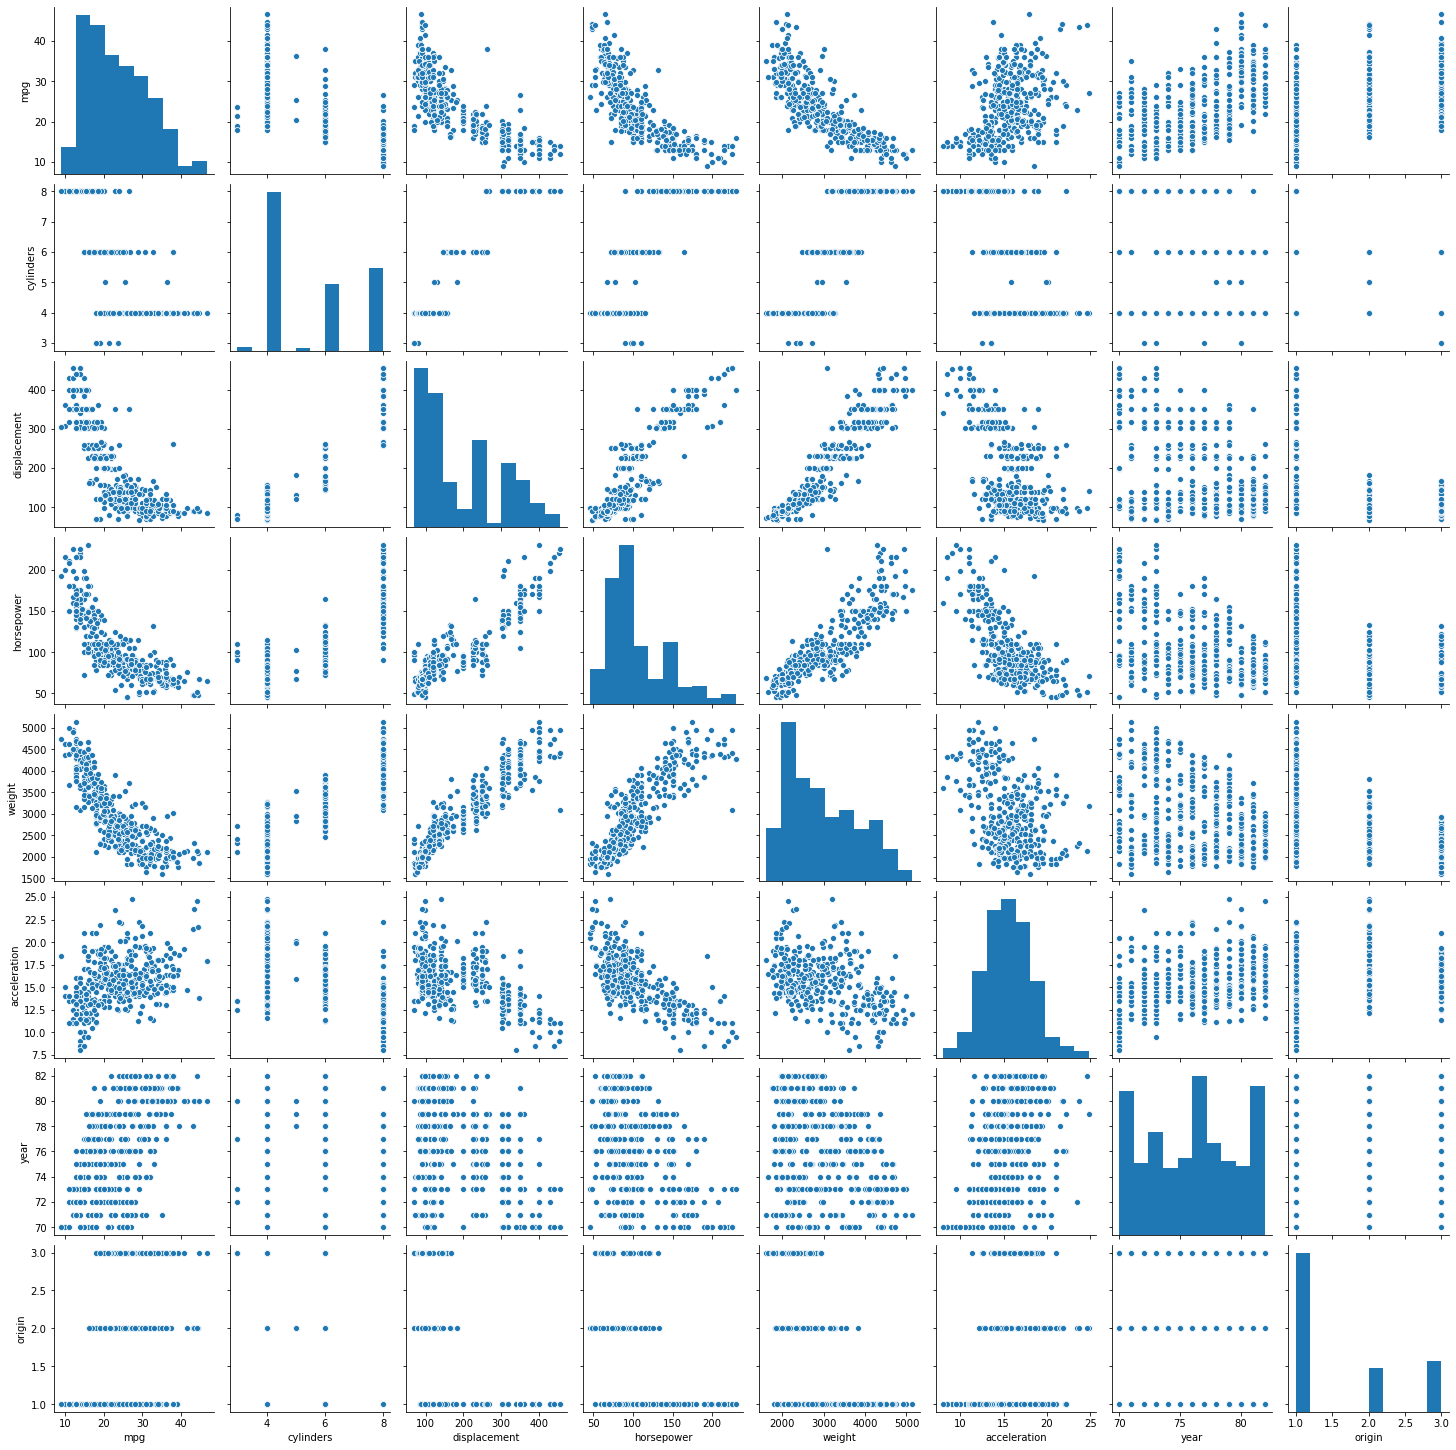

In [11]:
sns.pairplot(data=data)

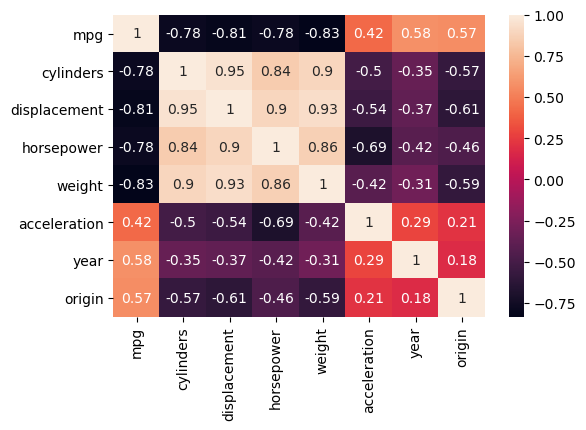

In [12]:
plt.figure(dpi=100)
sns.heatmap(data.corr(),annot=True)

In [13]:
results2=smf.ols('mpg ~ cylinders+ displacement+ horsepower+ weight+ acceleration+ year+ origin',data=data).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 21 May 2020   Prob (F-statistic):          2.04e-139
Time:                        12:38:58   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residue')

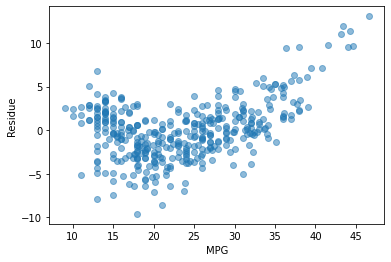

In [14]:
plt.scatter(data['mpg'],results2.resid,alpha=0.5)
plt.xlabel('MPG')
plt.ylabel('Residue')

Figure(432x288)


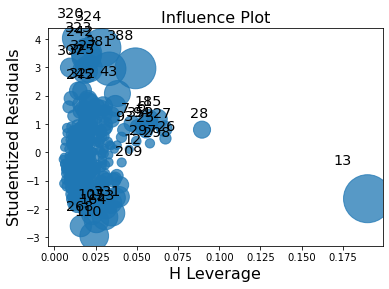

In [15]:
print(sm.graphics.influence_plot(results2, criterion="cooks"))

In [16]:
df_carseats=pd.read_csv('data/Carseats.csv')

In [17]:
df_carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [18]:
print(df_carseats.dtypes)
print(df_carseats.isna().any())

Unnamed: 0       int64
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object
Unnamed: 0     False
Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool


In [19]:
model=smf.ols('Sales ~ Price+ Urban + US',data=df_carseats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.39e-23
Time:                        12:39:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
modele=smf.ols('Sales ~ Price+ US', data=df_carseats).fit()
modele.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.66e-24
Time:                        12:39:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
print(modele.mse_resid)
print(modele.scale)

6.097920558687301
6.097920558687301


Text(0, 0.5, 'Residue')

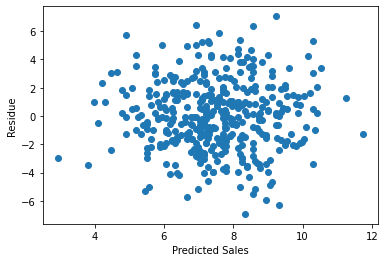

In [22]:
plt.scatter(modele.predict(),modele.resid)
plt.xlabel('Predicted Sales')
plt.ylabel('Residue')

Figure(432x288)


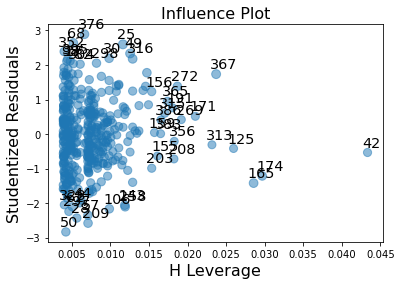

In [23]:
print(sm.graphics.influence_plot(modele,size=9,plot_alpha=0.5))

## Question 13

In [24]:
np.random.seed(0)
x=np.random.normal(0,1,100)
eps=np.random.normal(0,0.5,100)
y=-1 + 0.5*x + eps

df_rand=pd.DataFrame({'x':x,'y':y},index=np.arange(0,len(x),1))
model=smf.ols('y ~ x',data=df_rand).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     117.0
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.06e-18
Time:                        12:39:01   Log-Likelihood:                -75.359
No. Observations:                 100   AIC:                             154.7
Df Residuals:                      98   BIC:                             159.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9624      0.052    -18.500      0.000      -1.066      -0.859
x              0.5573      0.052     10.817      0.000       0.455       0.660
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.000
Skew:                           0.210   Prob(JB):                        0.223
Kurtosis:                       2.262   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df_rand['x2']=df_rand['x']**2
quad_model=smf.ols('y ~ x+ x2',data=df_rand).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     58.66
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.00e-17
Time:                        12:39:02   Log-Likelihood:                -75.005
No. Observations:                 100   AIC:                             156.0
Df Residuals:                      97   BIC:                             163.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9286      0.066    -14.047      0.000      -1.060      -0.797
x              0.5615      0.052     10.829      0.000       0.459       0.664
x2            -0.0334      0.040     -0.830      0.409      -0.113       0.046
==============================================================================
Omnibus:                        7.876   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.580
Skew:                           0.188   Prob(JB):                        0.167
Kurtosis:                       2.152   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

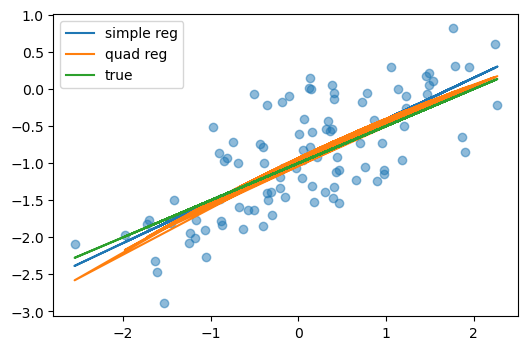

In [26]:
plt.figure(dpi=100)
plt.scatter(x,y,alpha=0.5)
plt.plot(x,model.predict(),label='simple reg')
plt.plot(x,quad_model.predict(),label='quad reg')
plt.plot(x,-1+0.5*x,label='true')
plt.legend()

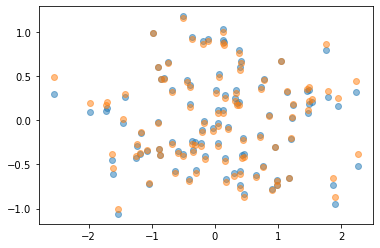

In [27]:
plt.scatter(x,model.resid,alpha=0.5)
plt.scatter(x,quad_model.resid,alpha=0.5)

## Question 14
This problem focusses on the 'Collinearity' Problem

In [92]:
np.random.seed(0)
x1=np.random.uniform(0,1,100)
x2= 0.5*x1 + np.random.normal(0,1,100)/10
y= 2 + 2*x1 + 0.3*x2 + np.random.normal(0,1,100)

df_coll=pd.DataFrame({'x1':x1,'x2':x2,'y':y},index=np.arange(0,len(y),1))
df_coll.head()

,x1,x2,y
0,0.548814,0.157892,2.791001
1,0.715189,0.447677,2.189731
2,0.602763,0.347948,2.666293
3,0.544883,0.118817,0.902008
4,0.423655,0.360653,3.580737


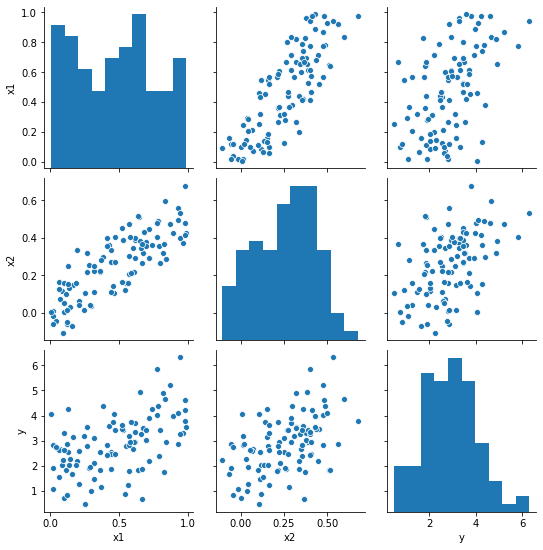

In [93]:
sns.pairplot(df_coll)

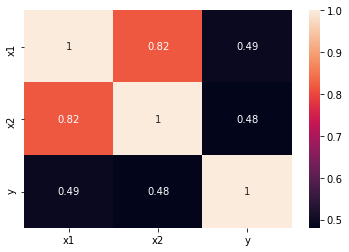

In [94]:
sns.heatmap(df_coll.corr(),annot=True)

#### Model_12

In [95]:
model_12=smf.ols('y ~ x1+ x2',data=df_coll).fit()
print(np.sqrt(model_12.mse_resid))
model_12.summary()

0.9868061813443415


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.16e-07
Time:                        13:01:49   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9217      0.191     10.071      0.000       1.543       2.300
x1             1.2007      0.597      2.011      0.047       0.016       2.385
x2             1.4931      0.991      1.507      0.135      -0.473       3.459
==============================================================================
Omnibus:                        0.196   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.026
Skew:                           0.032   Prob(JB):                        0.987
Kurtosis:                       3.046   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure(432x288)


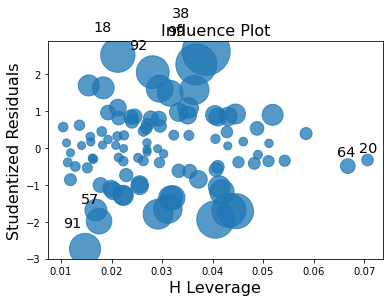

In [96]:
print(sm.graphics.influence_plot(model_12))

#### Model_1

In [97]:
model_1=smf.ols('y ~ x1',data=df_coll).fit()
print(np.sqrt(model_1.mse_resid))
model_1.summary()

0.993190410554805


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.76e-07
Time:                        13:01:49   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9548      0.191     10.247      0.000       1.576       2.333
x1             1.9378      0.344      5.625      0.000       1.254       2.621
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.050
Skew:                          -0.005   Prob(JB):                        0.975
Kurtosis:                       3.109   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure(432x288)


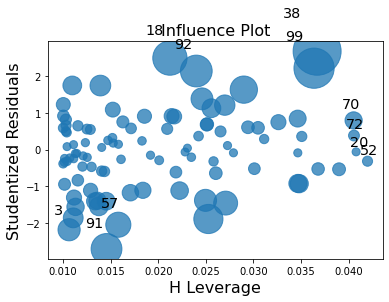

In [98]:
print(sm.graphics.influence_plot(model_1))

#### Model_2

In [99]:
model_2=smf.ols('y ~ x2',data=df_coll).fit()
print(np.sqrt(model_2.mse_resid))
model_2.summary()

1.0020246315295978


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.29e-07
Time:                        13:01:50   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0721      0.178     11.623      0.000       1.718       2.426
x2             3.1255      0.577      5.419      0.000       1.981       4.270
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.187
Skew:                           0.100   Prob(JB):                        0.911
Kurtosis:                       2.929   Cond. No.                         6.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure(432x288)


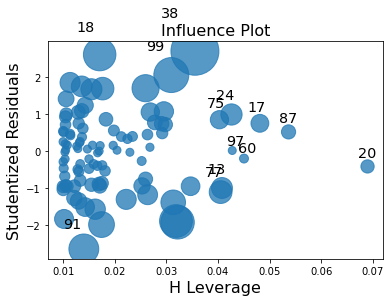

In [100]:
print(sm.graphics.influence_plot(model_2))

In [101]:
print(f'True: 2 + 2x1 +0.3x2')
print(f'model12: {model_12.params[0]} + {model_12.params[1]}x1 +{model_12.params[2]}x2 ')
print(f'model1: {model_1.params[0]} + {model_1.params[1]}x1')
print(f'model2: {model_2.params[0]} + {model_2.params[1]}x2 ')

True: 2 + 2x1 +0.3x2
model12: 1.9216645345431749 + 1.200679563435182x1 +1.4931301701048338x2 
model1: 1.954834582148951 + 1.9378282262654367x1
model2: 2.072056879191968 + 3.1254932653899834x2 


#### Adding another observation

In [102]:
df_coll.loc[len(df_coll)]=[0.1,0.8,6]
df_coll.tail()

,x1,x2,y
96,0.586513,0.212916,3.730642
97,0.020108,-0.058901,1.906441
98,0.828940,0.368917,1.737871
99,0.004695,0.004096,4.075113
100,0.100000,0.800000,6.000000


#### Repeating the modelling

In [103]:
model_12=smf.ols('y ~ x1+ x2',data=df_coll).fit()
print(np.sqrt(model_12.mse_resid))
model_12.summary()

1.0068613957046402


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     18.85
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.18e-07
Time:                        13:01:51   Log-Likelihood:                -142.48
No. Observations:                 101   AIC:                             291.0
Df Residuals:                      98   BIC:                             298.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9480      0.194     10.025      0.000       1.562       2.334
x1             0.4799      0.513      0.935      0.352      -0.538       1.498
x2             2.7923      0.820      3.407      0.001       1.166       4.419
==============================================================================
Omnibus:                        0.064   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.096
Skew:                           0.055   Prob(JB):                        0.953
Kurtosis:                       2.897   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure(432x288)


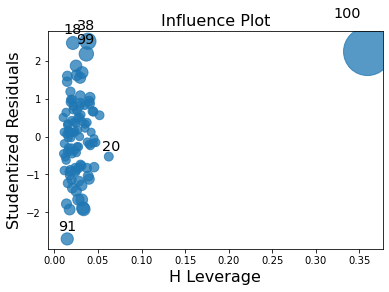

In [104]:
print(sm.graphics.influence_plot(model_12))

In [105]:
model_1=smf.ols('y ~ x1',data=df_coll).fit()
print(np.sqrt(model_1.mse_resid))
model_1.summary()

1.0594308638857532


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     23.57
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.50e-06
Time:                        13:01:51   Log-Likelihood:                -148.13
No. Observations:                 101   AIC:                             300.3
Df Residuals:                      99   BIC:                             305.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0719      0.201     10.315      0.000       1.673       2.470
x1             1.7696      0.364      4.855      0.000       1.046       2.493
==============================================================================
Omnibus:                        6.291   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.776
Skew:                           0.373   Prob(JB):                       0.0338
Kurtosis:                       4.027   Cond. No.                         4.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure(432x288)


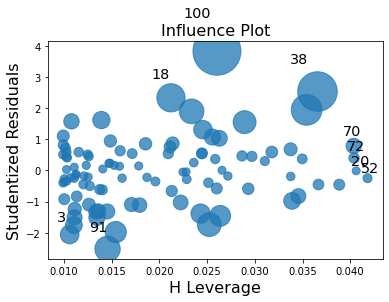

In [106]:
print(sm.graphics.influence_plot(model_1))

In [107]:
model_2=smf.ols('y ~ x2',data=df_coll).fit()
print(np.sqrt(model_2.mse_resid))
model_2.summary()

1.00622398879439


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     36.88
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.33e-08
Time:                        13:01:52   Log-Likelihood:                -142.93
No. Observations:                 101   AIC:                             289.9
Df Residuals:                      99   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0255      0.176     11.531      0.000       1.677       2.374
x2             3.3578      0.553      6.073      0.000       2.261       4.455
==============================================================================
Omnibus:                        0.071   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.141
Skew:                           0.061   Prob(JB):                        0.932
Kurtosis:                       2.864   Cond. No.                         5.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Figure(432x288)


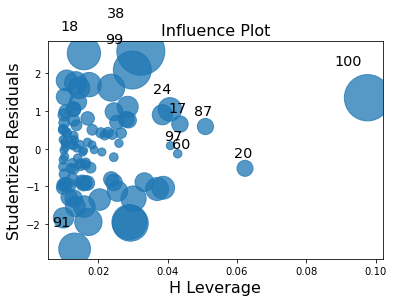

In [108]:
print(sm.graphics.influence_plot(model_2))

In [109]:
print(f'True: 2 + 2x1 +0.3x2')
print(f'model12: {model_12.params[0]} + {model_12.params[1]}x1 +{model_12.params[2]}x2 ')
print(f'model1: {model_1.params[0]} + {model_1.params[1]}x1')
print(f'model2: {model_2.params[0]} + {model_2.params[1]}x2 ')

True: 2 + 2x1 +0.3x2
model12: 1.9480396535423385 + 0.4798820109876636x1 +2.792328832234017x2 
model1: 2.071890734346955 + 1.7695844013778927x1
model2: 2.0255472282404243 + 3.3578270296117028x2 


## Question 15

In [110]:
df_boston=pd.read_csv('data/Boston.csv')
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [111]:
df_boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [152]:
df_boston.rad.value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64

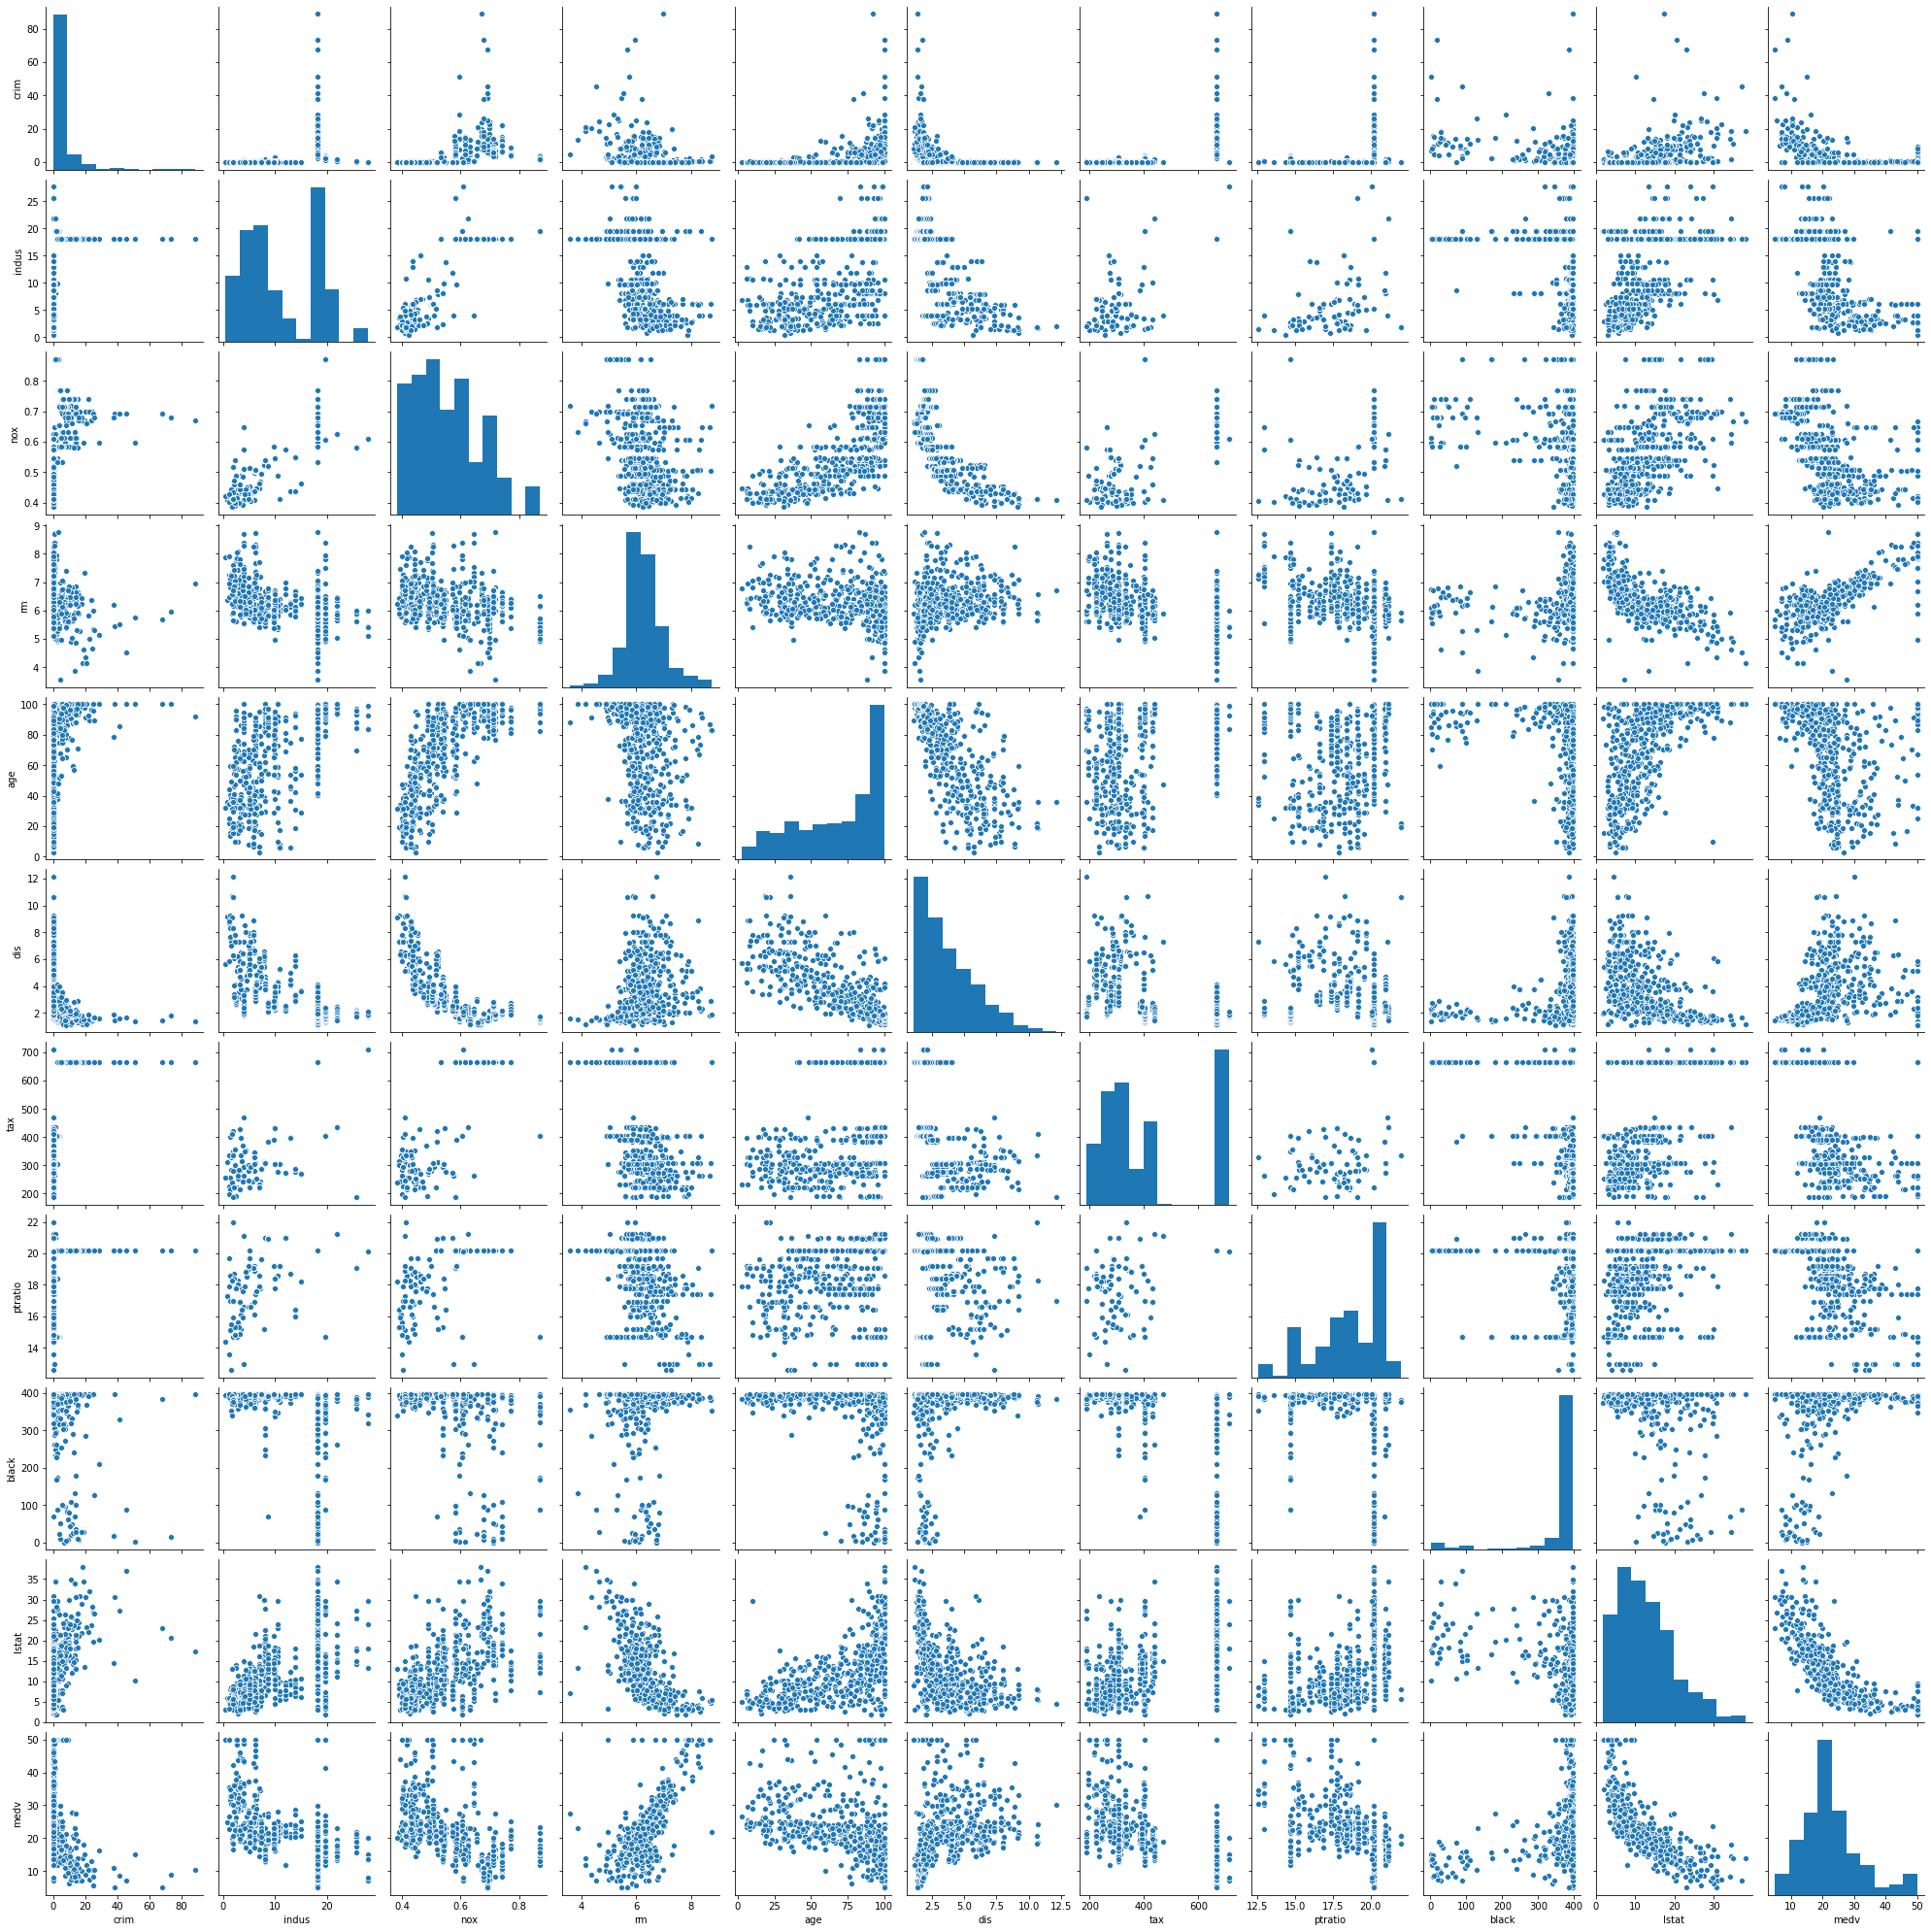

In [115]:
sns.pairplot(data=df_boston.drop(columns=['zn','chas','rad']))

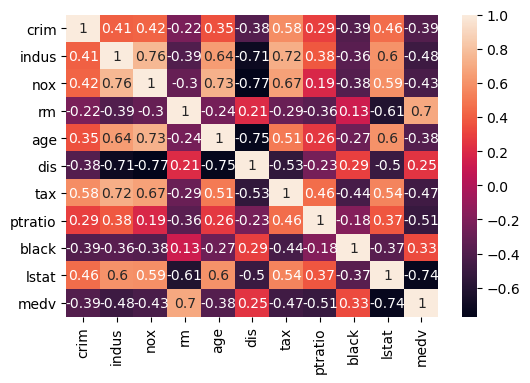

In [117]:
plt.figure(dpi=100)
sns.heatmap(data=df_boston.drop(columns=['zn','chas','rad']).corr(),annot=True)

(0.0, 10.0)

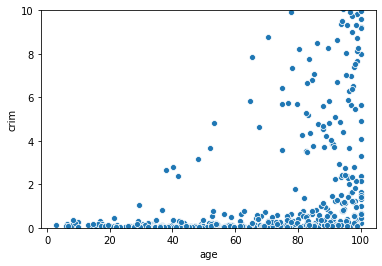

In [121]:
sns.scatterplot(x='age',y='crim',data=df_boston)
plt.ylim(0,10)

#### Fitting single predictor models

In [159]:
models={var:smf.ols(f'crim ~ {var}',data=df_boston).fit() for var in df_boston.columns[1:]}
models['rad']=smf.ols('crim ~ C(rad)',data=df_boston).fit()

Sorting the Models according to their adjusted $R^2$ score

In [162]:
for var in sorted(models,key=lambda x: models[x].rsquared_adj,reverse=True):
    print(f'{var} : {models[var].rsquared_adj}\t{models[var].fvalue}')

rad : 0.39070719268282483	41.47871769026888
tax : 0.3383039541791668	259.19029437987365
lstat : 0.20601869232110992	132.03512465086544
nox : 0.1755846762010127	108.55532911847159
indus : 0.16365393961811425	99.81703689667755
medv : 0.14909550966295126	89.48611475768125
black : 0.14658430735949635	87.73976334734245
dis : 0.1424512586058062	84.88780966429533
age : 0.12268419273465869	71.6194016087805
ptratio : 0.08225111441783084	46.25945324864755
rm : 0.04618036496353595	25.45020363382862
zn : 0.038283518960746	21.102782323419042
chas : 0.0011459401318837381	1.5793636826962518


(0.0, 20.0)

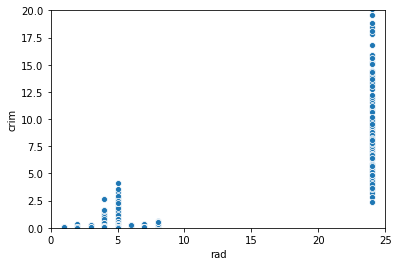

In [165]:
sns.scatterplot(y='crim',x='rad',data=df_boston)
plt.xlim(0,25)
plt.ylim(0,20)